# Анализ данных о популярных новинках кинопроката с помощью сайта ЕАИС

Задание 3. Перед вами стоит задача подготовить рекомендации отделу закупок контента по кинотеатральным релизам за последние 3 месяца. Для этого вы договорились с заказчиком проанализировать данные фонда кино на https://ekinobilet.fond-kino.ru/ 

Необходимо спарсить данные с сайта, подготовить их, провести EDA, визуализировать полученные выводы. 
Заказчик ожидает увидеть список топовых кинотеатральных релизов и любые дополнительные выводы, которые вы получите в ходе работы с данными.

В качестве решения мы ожидаем готовый к демонстрации jupyter notebook, который мы будем обсуждать на собеседовании.

Загружаем драйвер и необходимые библиотеки

In [17]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import re


options = webdriver.ChromeOptions()

chrome_driver = webdriver.Chrome('E:\chromedriver', options=options)
chrome_driver.implicitly_wait(15)

Загружаем сайт фонда кино

In [18]:
chrome_driver.get(url='https://ekinobilet.fond-kino.ru/')

Запускаем скрипт получения данных фильмов

In [19]:
trend_movies_block = chrome_driver.find_element_by_class_name('ts-right')
prev_date_btn = trend_movies_block.find_element_by_class_name('rs-prev')
top_grossing_movies_by_day = trend_movies_block.find_elements_by_class_name('sl-item-gray')

# первый раз
movies_data = []
today_is = trend_movies_block.find_element_by_class_name('rs-val').get_attribute("innerText")
for i, movie in enumerate(top_grossing_movies_by_day):
    title = movie.find_element_by_css_selector('a').get_attribute("title")
    fees = int(''.join(re.findall('\d+', movie.find_element_by_class_name('-fees').get_attribute("textContent"))))
    watchers = int(''.join(re.findall('\d+', movie.find_element_by_class_name('-spectators').get_attribute("textContent"))))
    screens = int(''.join(re.findall('\d+', movie.find_element_by_class_name('-sessions').get_attribute("textContent"))))
    movies_data.append([today_is, i+1, title, fees, watchers, screens])
    

# цикл по дням
for days_back in range(89):
    prev_date_btn.click()
    delay = 30  # секунд
    # ждем загрузки данных за день
    day_load_test = WebDriverWait(chrome_driver, delay).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, '.ts-right .sl-item-gray'))
    )
    
    # обновляем элементы
    prev_date_btn = trend_movies_block.find_element_by_class_name('rs-prev')
    top_grossing_movies_by_day = trend_movies_block.find_elements_by_class_name('sl-item-gray')

    # получаем данные фильмов за день
    today_is = trend_movies_block.find_element_by_class_name('rs-val').get_attribute("innerText")
    for i, movie in enumerate(top_grossing_movies_by_day):
        title = movie.find_element_by_css_selector('a').get_attribute("title")
        fees = int(''.join(re.findall('\d+', movie.find_element_by_class_name('-fees').get_attribute("textContent"))))
        watchers = int(''.join(re.findall('\d+', movie.find_element_by_class_name('-spectators').get_attribute("textContent"))))
        screens = int(''.join(re.findall('\d+', movie.find_element_by_class_name('-sessions').get_attribute("textContent"))))
        movies_data.append([today_is, i+1, title, fees, watchers, screens])

In [20]:
import pandas as pd


top_releases_df = pd.DataFrame(movies_data, columns=[
    'date',
    'position_in_top',
    'title',
    'fees_amount',
    'watchers_amount',
    'screens_amount'
])

In [21]:
top_releases_df.head()

,date,position_in_top,title,fees_amount,watchers_amount,screens_amount
0,27 июн. 2021 г.,1,Лука,7161456,32145,2862
1,27 июн. 2021 г.,2,Круэлла,2440899,8798,1223
2,27 июн. 2021 г.,3,Телохранитель жены киллера,1662233,5456,1000
3,27 июн. 2021 г.,4,Бендер: Начало,1071137,4229,1184
4,27 июн. 2021 г.,5,Ледяной драйв,1066756,3514,682


Найдем данные самого популярного фильма 27 июня за все время

In [22]:
luca_df = top_releases_df[top_releases_df.title == 'Лука']
fees_sum = luca_df.fees_amount.sum()
watchers_sum = luca_df.watchers_amount.sum()
screens_top = luca_df.screens_amount.max()

print(f'Всего сборов: {fees_sum}')
print(f'Всего зрителей: {watchers_sum}')
print(f'Наибольшее кол-во сеансов: {screens_top}')

Всего сборов: 239914441
Всего зрителей: 1073328
Наибольшее кол-во сеансов: 8832


In [23]:
luca_df

,date,position_in_top,title,fees_amount,watchers_amount,screens_amount
0,27 июн. 2021 г.,1,Лука,7161456,32145,2862
12,26 июн. 2021 г.,1,Лука,24036993,94511,5740
24,25 июн. 2021 г.,1,Лука,14116644,66795,5104
36,24 июн. 2021 г.,1,Лука,14257949,69851,5397
48,23 июн. 2021 г.,1,Лука,18304490,93615,7579
60,22 июн. 2021 г.,1,Лука,17988330,89876,7385
72,21 июн. 2021 г.,1,Лука,18462094,93440,7412
84,20 июн. 2021 г.,1,Лука,36556631,142589,8832
96,19 июн. 2021 г.,1,Лука,35174157,137064,8815
108,18 июн. 2021 г.,1,Лука,25615434,120380,8230


Видим, что с самого появления в прокате фильм занимает лидерскую позицию и набрал суммарно 1 млн зрителей. Явно хороший кандидат для закупки

Посмотрим данные самого кассового фильма последних трех месяцев - Форсаж 9

In [24]:
f9_df = top_releases_df[top_releases_df.title == 'Форсаж 9']
fees_sum = f9_df.fees_amount.sum()
watchers_sum = f9_df.watchers_amount.sum()
screens_top = f9_df.screens_amount.max()

print(f'Всего сборов: {fees_sum}')
print(f'Всего зрителей: {watchers_sum}')
print(f'Наибольшее кол-во сеансов: {screens_top}')

Всего сборов: 1142073180
Всего зрителей: 3979052
Наибольшее кол-во сеансов: 13715


In [25]:
f9_df

,date,position_in_top,title,fees_amount,watchers_amount,screens_amount
10,27 июн. 2021 г.,11,Форсаж 9,243856,923,143
21,26 июн. 2021 г.,10,Форсаж 9,1645188,5912,381
34,25 июн. 2021 г.,11,Форсаж 9,904465,3592,315
45,24 июн. 2021 г.,10,Форсаж 9,999423,4177,398
53,23 июн. 2021 г.,6,Форсаж 9,1598085,7617,658
65,22 июн. 2021 г.,6,Форсаж 9,1670914,8225,674
77,21 июн. 2021 г.,6,Форсаж 9,1643187,7703,659
89,20 июн. 2021 г.,6,Форсаж 9,3144874,10691,722
101,19 июн. 2021 г.,6,Форсаж 9,3252976,11093,723
113,18 июн. 2021 г.,6,Форсаж 9,2271746,8577,693


In [26]:
top_releases_df[top_releases_df.title == 'Форсаж 9'].watchers_amount.sum()

3979052

Фильм долго держался в топ-1, но на третьем уикенде уступил 2 позиции, и начал постепенно опускаться ниже в топе. Очевидный кандидат для закупки

Таким же образом можно пройтись по всем фильмам датафрейма

In [27]:
unique_titles = list(set(top_releases_df.title.to_list()))

movies_counted = []
for title in unique_titles:
    fees = top_releases_df[top_releases_df.title == title].fees_amount.sum()
    watchers_sum = top_releases_df[top_releases_df.title == title].watchers_amount.sum()
    ticket_cost = round(fees / watchers_sum, 1)
    screens_best = top_releases_df[top_releases_df.title == title].screens_amount.max()
    screens_worst = top_releases_df[top_releases_df.title == title].screens_amount.min()
    
    # данные средней наработки на сеанс за день
    fees_list = top_releases_df[top_releases_df.title == title].fees_amount.to_list()
    screens_list = top_releases_df[top_releases_df.title == title].screens_amount.to_list()
    screen_income_list = []
    for i, fee in enumerate(fees_list):
        screen_income_list.append(fee / screens_list[i])  # наработка за день
    # вывод данных из средней наработки на сеанс
    best_screen_income = round(max(screen_income_list), 1)
    worst_screen_income = round(min(screen_income_list), 1)
    avg_screen_income = round(sum(screen_income_list) / len(screen_income_list), 1)
    
    # данные среднего числа зрителей на сеансе за день
    watchers_list = top_releases_df[top_releases_df.title == title].watchers_amount.to_list()
    screens_list = top_releases_df[top_releases_df.title == title].screens_amount.to_list()
    screen_watchers_list = []
    for i, watchers in enumerate(watchers_list):
        screen_watchers_list.append(watchers / screens_list[i])  # наработка за день
    # вывод данных из среднего числа зрителей на сеансе
    best_screen_watchers = round(max(screen_watchers_list), 1)
    worst_screen_watchers = round(min(screen_watchers_list), 1)
    avg_screen_watchers = round(sum(screen_watchers_list) / len(screen_watchers_list), 1)
    
    best_place = top_releases_df[top_releases_df.title == title].position_in_top.min()
    worst_place = top_releases_df[top_releases_df.title == title].position_in_top.max()
    
    first_seen = top_releases_df[top_releases_df.title == title].date.to_list()[-1]
    last_seen = top_releases_df[top_releases_df.title == title].date.to_list()[0]
    days_in_top = len(top_releases_df[top_releases_df.title == title].date.to_list())
        
    # собираем совокупную аналитику по каждому фильму дневного топа за 3 месяца
    movies_counted.append([title, fees, watchers_sum, ticket_cost, screens_best, screens_worst,
                           best_screen_income, worst_screen_income, avg_screen_income,
                           best_screen_watchers, worst_screen_watchers, avg_screen_watchers,
                           best_place, worst_place, first_seen, last_seen, days_in_top])

    
# переводим аналитику в датафрейм
movies_df = pd.DataFrame(movies_counted, columns=[
    'title',
    'fees_sum',
    'watchers_sum',
    'ticket_cost_avg',
    'screens_best',
    'screens_worst',
    'screen_income_max',
    'screen_income_min',
    'screen_income_avg',
    'screen_watchers_max',
    'screen_watchers_min',
    'screen_watchers_avg',
    'best_place',
    'worst_place',
    'first_seen',
    'last_seen',
    'days_in_top'
])

In [28]:
movies_df[movies_df.title == 'Форсаж 9']

,title,fees_sum,watchers_sum,ticket_cost_avg,screens_best,screens_worst,screen_income_max,screen_income_min,screen_income_avg,screen_watchers_max,screen_watchers_min,screen_watchers_avg,best_place,worst_place,first_seen,last_seen,days_in_top
54,Форсаж 9,1142073180,3979052,287.0,13715,143,10515.8,1705.3,4283.3,33.1,6.5,15.8,1,11,19 мая 2021 г.,27 июн. 2021 г.,40


#### Рассмотрим самые кассовые фильмы последних 3 месяцев

In [29]:
top_by_fees = movies_df.sort_index().sort_values('fees_sum', ascending=False, kind='mergesort').reset_index(drop=True)

In [30]:
top_by_fees.head(10)

,title,fees_sum,watchers_sum,ticket_cost_avg,screens_best,screens_worst,screen_income_max,screen_income_min,screen_income_avg,screen_watchers_max,screen_watchers_min,screen_watchers_avg,best_place,worst_place,first_seen,last_seen,days_in_top
0,Форсаж 9,1142073180,3979052,287.0,13715,143,10515.8,1705.3,4283.3,33.1,6.5,15.8,1,11,19 мая 2021 г.,27 июн. 2021 г.,40
1,Гнев человеческий,878058999,2719510,322.9,8535,219,11348.4,2092.3,4901.3,32.1,9.4,15.8,1,11,22 апр. 2021 г.,15 июн. 2021 г.,55
2,Мортал Комбат,862524466,2922726,295.1,11904,433,12648.4,1232.7,4168.8,39.1,5.9,14.6,1,10,08 апр. 2021 г.,12 мая 2021 г.,35
3,Круэлла,602087233,2194870,274.3,8735,1223,6807.7,1995.8,4438.4,22.5,7.2,16.5,1,3,03 июн. 2021 г.,27 июн. 2021 г.,25
4,Тихое место 2,488358233,1683269,290.1,8844,260,12139.7,2066.8,4514.4,36.4,6.9,15.8,1,8,29 мая 2021 г.,27 июн. 2021 г.,30
5,Годзилла против Конга,398197667,1458306,273.1,9369,401,8453.5,1559.1,3674.6,27.3,7.2,13.8,1,12,30 мар. 2021 г.,25 апр. 2021 г.,24
6,Чернобыль,375807888,1393968,269.6,8511,43,14463.5,915.5,3090.9,47.2,4.9,11.6,1,12,14 апр. 2021 г.,18 мая 2021 г.,35
7,Кролик Питер 2,338933577,1560139,217.2,8368,411,5082.9,1134.0,2722.2,23.1,5.1,13.5,1,11,13 мая 2021 г.,23 июн. 2021 г.,42
8,Майор Гром: Чумной Доктор,314707116,1129865,278.5,7762,122,7744.4,1168.4,3805.3,25.7,5.9,13.8,2,12,01 апр. 2021 г.,17 мая 2021 г.,44
9,Прабабушка лёгкого поведения,311861776,1103610,282.6,8524,406,7372.8,1254.5,2932.0,24.2,5.7,10.9,1,12,01 мая 2021 г.,02 июн. 2021 г.,33


Заметим, что для них характерны высокие места в топе и продолжительное в нем нахождение. Более старые фильмы опускаются на низкие строчки дневного рейтинга, что легко объяснимо

#### Рассмотрим самые популярные у зрителей фильмы

In [31]:
top_by_watchers = movies_df.sort_index().sort_values('watchers_sum', ascending=False, kind='mergesort').reset_index(drop=True)

In [32]:
top_by_watchers.head(10)

,title,fees_sum,watchers_sum,ticket_cost_avg,screens_best,screens_worst,screen_income_max,screen_income_min,screen_income_avg,screen_watchers_max,screen_watchers_min,screen_watchers_avg,best_place,worst_place,first_seen,last_seen,days_in_top
0,Форсаж 9,1142073180,3979052,287.0,13715,143,10515.8,1705.3,4283.3,33.1,6.5,15.8,1,11,19 мая 2021 г.,27 июн. 2021 г.,40
1,Мортал Комбат,862524466,2922726,295.1,11904,433,12648.4,1232.7,4168.8,39.1,5.9,14.6,1,10,08 апр. 2021 г.,12 мая 2021 г.,35
2,Гнев человеческий,878058999,2719510,322.9,8535,219,11348.4,2092.3,4901.3,32.1,9.4,15.8,1,11,22 апр. 2021 г.,15 июн. 2021 г.,55
3,Круэлла,602087233,2194870,274.3,8735,1223,6807.7,1995.8,4438.4,22.5,7.2,16.5,1,3,03 июн. 2021 г.,27 июн. 2021 г.,25
4,Тихое место 2,488358233,1683269,290.1,8844,260,12139.7,2066.8,4514.4,36.4,6.9,15.8,1,8,29 мая 2021 г.,27 июн. 2021 г.,30
5,Кролик Питер 2,338933577,1560139,217.2,8368,411,5082.9,1134.0,2722.2,23.1,5.1,13.5,1,11,13 мая 2021 г.,23 июн. 2021 г.,42
6,Годзилла против Конга,398197667,1458306,273.1,9369,401,8453.5,1559.1,3674.6,27.3,7.2,13.8,1,12,30 мар. 2021 г.,25 апр. 2021 г.,24
7,Чернобыль,375807888,1393968,269.6,8511,43,14463.5,915.5,3090.9,47.2,4.9,11.6,1,12,14 апр. 2021 г.,18 мая 2021 г.,35
8,Майор Гром: Чумной Доктор,314707116,1129865,278.5,7762,122,7744.4,1168.4,3805.3,25.7,5.9,13.8,2,12,01 апр. 2021 г.,17 мая 2021 г.,44
9,Девятаев,307601574,1117575,275.2,6735,335,5433.3,1037.4,2646.9,19.0,5.3,10.4,2,9,29 апр. 2021 г.,26 мая 2021 г.,28


В целом списки довольно похожи, но есть и отличающиеся позиции. Найдем их отдельно

In [33]:
different_df = top_by_watchers[
    top_by_watchers.index.isin(
        top_by_watchers.loc[
            top_by_watchers['title'] != top_by_fees['title']
        ].index
    )
]
different_df[different_df.index < 10]

,title,fees_sum,watchers_sum,ticket_cost_avg,screens_best,screens_worst,screen_income_max,screen_income_min,screen_income_avg,screen_watchers_max,screen_watchers_min,screen_watchers_avg,best_place,worst_place,first_seen,last_seen,days_in_top
1,Мортал Комбат,862524466,2922726,295.1,11904,433,12648.4,1232.7,4168.8,39.1,5.9,14.6,1,10,08 апр. 2021 г.,12 мая 2021 г.,35
2,Гнев человеческий,878058999,2719510,322.9,8535,219,11348.4,2092.3,4901.3,32.1,9.4,15.8,1,11,22 апр. 2021 г.,15 июн. 2021 г.,55
5,Кролик Питер 2,338933577,1560139,217.2,8368,411,5082.9,1134.0,2722.2,23.1,5.1,13.5,1,11,13 мая 2021 г.,23 июн. 2021 г.,42
6,Годзилла против Конга,398197667,1458306,273.1,9369,401,8453.5,1559.1,3674.6,27.3,7.2,13.8,1,12,30 мар. 2021 г.,25 апр. 2021 г.,24
7,Чернобыль,375807888,1393968,269.6,8511,43,14463.5,915.5,3090.9,47.2,4.9,11.6,1,12,14 апр. 2021 г.,18 мая 2021 г.,35
9,Девятаев,307601574,1117575,275.2,6735,335,5433.3,1037.4,2646.9,19.0,5.3,10.4,2,9,29 апр. 2021 г.,26 мая 2021 г.,28


Видим, что фильм "Девятаев" опередил по количеству зрителей фильм "Прабабушка лёгкого поведения". Остальные фильмы в топе те же, но на немного отличающихся позициях

#### Фильмы с самым большим количеством сеансов за день

In [34]:
top_by_screens = movies_df.sort_index().sort_values(
    'screens_best', ascending=False, kind='mergesort'
).reset_index(drop=True)
top_by_screens.head(15)

,title,fees_sum,watchers_sum,ticket_cost_avg,screens_best,screens_worst,screen_income_max,screen_income_min,screen_income_avg,screen_watchers_max,screen_watchers_min,screen_watchers_avg,best_place,worst_place,first_seen,last_seen,days_in_top
0,Форсаж 9,1142073180,3979052,287.0,13715,143,10515.8,1705.3,4283.3,33.1,6.5,15.8,1,11,19 мая 2021 г.,27 июн. 2021 г.,40
1,Мортал Комбат,862524466,2922726,295.1,11904,433,12648.4,1232.7,4168.8,39.1,5.9,14.6,1,10,08 апр. 2021 г.,12 мая 2021 г.,35
2,Годзилла против Конга,398197667,1458306,273.1,9369,401,8453.5,1559.1,3674.6,27.3,7.2,13.8,1,12,30 мар. 2021 г.,25 апр. 2021 г.,24
3,Тихое место 2,488358233,1683269,290.1,8844,260,12139.7,2066.8,4514.4,36.4,6.9,15.8,1,8,29 мая 2021 г.,27 июн. 2021 г.,30
4,Лука,239914441,1073328,223.5,8832,2862,4187.6,2415.2,3098.4,16.5,11.2,13.9,1,1,17 июн. 2021 г.,27 июн. 2021 г.,11
5,Круэлла,602087233,2194870,274.3,8735,1223,6807.7,1995.8,4438.4,22.5,7.2,16.5,1,3,03 июн. 2021 г.,27 июн. 2021 г.,25
6,Гнев человеческий,878058999,2719510,322.9,8535,219,11348.4,2092.3,4901.3,32.1,9.4,15.8,1,11,22 апр. 2021 г.,15 июн. 2021 г.,55
7,Прабабушка лёгкого поведения,311861776,1103610,282.6,8524,406,7372.8,1254.5,2932.0,24.2,5.7,10.9,1,12,01 мая 2021 г.,02 июн. 2021 г.,33
8,Чернобыль,375807888,1393968,269.6,8511,43,14463.5,915.5,3090.9,47.2,4.9,11.6,1,12,14 апр. 2021 г.,18 мая 2021 г.,35
9,Кролик Питер 2,338933577,1560139,217.2,8368,411,5082.9,1134.0,2722.2,23.1,5.1,13.5,1,11,13 мая 2021 г.,23 июн. 2021 г.,42


Так как при таком ранжировании не учитываются сборы и зрители, в топ попали и популярные июньские новинки "Лука", "Заклятие 3", "Телохранитель жены киллера" и "Круэлла"

#### Фильмы с самым продолжительным нахождением в топе

In [35]:
top_by_screens = movies_df.sort_index().sort_values(
    'days_in_top', kind='mergesort', ascending=False
).reset_index(drop=True)
top_by_screens.head(10)

,title,fees_sum,watchers_sum,ticket_cost_avg,screens_best,screens_worst,screen_income_max,screen_income_min,screen_income_avg,screen_watchers_max,screen_watchers_min,screen_watchers_avg,best_place,worst_place,first_seen,last_seen,days_in_top
0,Гнев человеческий,878058999,2719510,322.9,8535,219,11348.4,2092.3,4901.3,32.1,9.4,15.8,1,11,22 апр. 2021 г.,15 июн. 2021 г.,55
1,Майор Гром: Чумной Доктор,314707116,1129865,278.5,7762,122,7744.4,1168.4,3805.3,25.7,5.9,13.8,2,12,01 апр. 2021 г.,17 мая 2021 г.,44
2,Кролик Питер 2,338933577,1560139,217.2,8368,411,5082.9,1134.0,2722.2,23.1,5.1,13.5,1,11,13 мая 2021 г.,23 июн. 2021 г.,42
3,Отец,92566576,254232,364.1,482,105,11510.7,2013.3,6217.9,28.5,7.0,17.2,5,10,15 апр. 2021 г.,26 мая 2021 г.,42
4,Форсаж 9,1142073180,3979052,287.0,13715,143,10515.8,1705.3,4283.3,33.1,6.5,15.8,1,11,19 мая 2021 г.,27 июн. 2021 г.,40
5,Чернобыль,375807888,1393968,269.6,8511,43,14463.5,915.5,3090.9,47.2,4.9,11.6,1,12,14 апр. 2021 г.,18 мая 2021 г.,35
6,Мортал Комбат,862524466,2922726,295.1,11904,433,12648.4,1232.7,4168.8,39.1,5.9,14.6,1,10,08 апр. 2021 г.,12 мая 2021 г.,35
7,Прабабушка лёгкого поведения,311861776,1103610,282.6,8524,406,7372.8,1254.5,2932.0,24.2,5.7,10.9,1,12,01 мая 2021 г.,02 июн. 2021 г.,33
8,Тихое место 2,488358233,1683269,290.1,8844,260,12139.7,2066.8,4514.4,36.4,6.9,15.8,1,8,29 мая 2021 г.,27 июн. 2021 г.,30
9,Райя и последний дракон,100917060,433727,232.7,2119,211,8968.7,1126.3,4132.6,37.7,5.9,17.4,3,12,30 мар. 2021 г.,10 мая 2021 г.,28


Не всегда самые топовые фильмы по сборам, но уверенно держащие интерес зрителя

### Визуализация данных (на примере топ-1 фильма "Форсаж 9")

Место в топе по дням

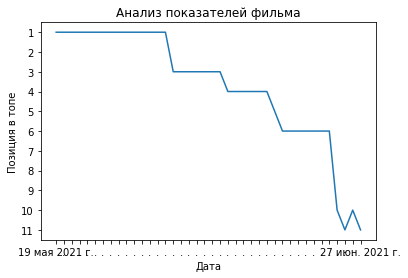

In [36]:
import matplotlib.pyplot as plt

movie_title = 'Форсаж 9'


movie_data = top_releases_df[top_releases_df.title == movie_title]
movie_data = movie_data.sort_index(ascending=False).reset_index(drop=True)

labels = movie_data.date.to_list()
for i in range(len(labels)-2):
    labels[i+1] = "."
position_data = movie_data.position_in_top.to_list()

x = [i for i in range(len(labels))]
y = [i+1 for i in range(max(position_data))]

plt.plot(x, position_data)
plt.gca().invert_yaxis()
plt.xticks(ticks=x, labels=labels)
plt.yticks(ticks=y)
plt.title('Анализ показателей фильма')
plt.xlabel('Дата')
plt.ylabel('Позиция в топе')
plt.show()

Сборы по дням

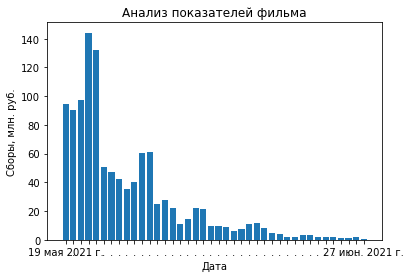

In [37]:
fees_data = movie_data.fees_amount.to_list()

x = [i for i in range(len(labels))]

plt.bar(x, [i / 1000000 for i in fees_data])
# plt.ticklabel_format(style='plain')
plt.xticks(ticks=x, labels=labels)
plt.title('Анализ показателей фильма')
plt.xlabel('Дата')
plt.ylabel('Сборы, млн. руб.')
plt.show()

Зрители по дням

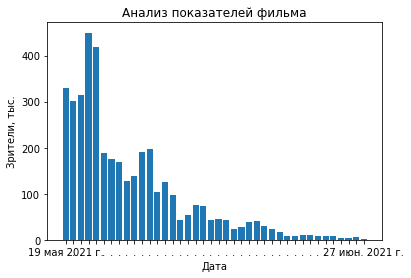

In [38]:
watchers_data = movie_data.watchers_amount.to_list()

x = [i for i in range(len(labels))]

plt.bar(x, [i / 1000 for i in watchers_data])
# plt.ticklabel_format(style='plain')
plt.xticks(ticks=x, labels=labels)
plt.title('Анализ показателей фильма')
plt.xlabel('Дата')
plt.ylabel('Зрители, тыс.')
plt.show()

Количество сеансов в день

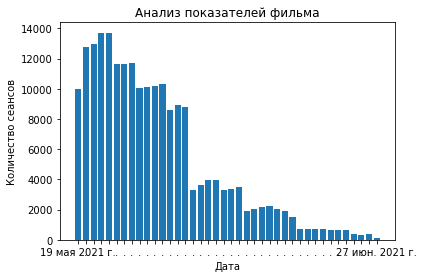

In [39]:
screens_data = movie_data.screens_amount.to_list()

x = [i for i in range(len(labels))]

plt.bar(x, screens_data)
plt.xticks(ticks=x, labels=labels)
plt.title('Анализ показателей фильма')
plt.xlabel('Дата')
plt.ylabel('Количество сеансов')
plt.show()

# ДОПЫ

Это дополнительный скрипт для проверки кликов, без запуска полного механизма

In [285]:
# вспомогательный тестовый скрипт
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import re


options = webdriver.ChromeOptions()

chrome_driver = webdriver.Chrome('E:\chromedriver', options=options)
chrome_driver.implicitly_wait(15)

chrome_driver.get(url='https://ekinobilet.fond-kino.ru/')

trend_movies_block = chrome_driver.find_element_by_class_name('ts-right')
prev_date_btn = trend_movies_block.find_element_by_class_name('rs-prev')
top_grossing_movies_by_day = trend_movies_block.find_elements_by_class_name('sl-item-gray')

movies_data = []
today_is = trend_movies_block.find_element_by_class_name('rs-val').get_attribute("innerText")
for i, movie in enumerate(top_grossing_movies_by_day):
    title = movie.find_element_by_css_selector('a').get_attribute('title')
    fees = int(''.join(re.findall('\d+', movie.find_element_by_class_name('-fees').get_attribute("textContent"))))
    watchers = ''.join(re.findall('\d+', movie.find_element_by_class_name('-spectators').get_attribute("textContent")))
    screens = ''.join(re.findall('\d+', movie.find_element_by_class_name('-sessions').get_attribute("textContent")))
    movies_data.append([today_is, i+1, title, fees, watchers, screens])
    
prev_date_btn.click()
delay = 10  # секунд
movie_load_test = WebDriverWait(chrome_driver, delay).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, '.ts-right .sl-item-gray'))
)

prev_date_btn = trend_movies_block.find_element_by_class_name('rs-prev')
trend_movies_block = chrome_driver.find_element_by_class_name('ts-right')
top_grossing_movies_by_day = trend_movies_block.find_elements_by_class_name('sl-item-gray')
    
today_is = trend_movies_block.find_element_by_class_name('rs-val').get_attribute("innerText")
for i, movie in enumerate(top_grossing_movies_by_day):
    title = movie.find_element_by_css_selector('a').get_attribute("title")
    fees = int(''.join(re.findall('\d+', movie.find_element_by_class_name('-fees').get_attribute("textContent"))))
    watchers = ''.join(re.findall('\d+', movie.find_element_by_class_name('-spectators').get_attribute("textContent")))
    screens = ''.join(re.findall('\d+', movie.find_element_by_class_name('-sessions').get_attribute("textContent")))
    movies_data.append([today_is, i+1, title, fees, watchers, screens])

Можно добавить процент времени нахождения в топе, но надо преобразовать дату в свободной форме записи к формату datetime

### Первое задание

Написать SQL-запрос для расчета top10 фильмов по количеству уникальных
пользователей в разбивке по месяцам. Посчитать динамику в процентах от месяца к
месяцу для фильмов из top10. Для фильмов, которые пришли в top10 первый раз
считать, что в предыдущем месяце у них не было показов.

#### Данные

**сontent - фильмы (контент)**

    content_id integer,

    title varchar

**сontent_watch - показы контента**

    watch_id varchar - уникальный идентификатор показа

    content_id integer- id контента

    show_date timestamp - дата и время показа

    user_id integer - уникальный идентификатор пользователя

    сalendar - справочник дат с 1900 по 2100 год по дням

    date timestamp

In [1]:
sql_request = """
SELECT 
    date_df AS current_month,
    top_rank AS top10_position,
    title,
    month_watchers AS unique_users,
    percent_increase AS previous_month_diff
FROM (
    SELECT 
        *,
        ROW_NUMBER() OVER(
            PARTITION BY mrank
            ORDER BY mrank, month_watchers DESC
        ) AS top_rank
    FROM (
        SELECT 
            *,
            CASE WHEN previous_month_watchers IS NOT NULL THEN
                CONCAT(
                    ROUND(
                        (month_watchers - previous_month_watchers)::NUMERIC / previous_month_watchers * 100,
                        1
                    ),'%') 
            ELSE
                NULL
            END AS percent_increase
        FROM (
            SELECT
                *,
                LAG(month_watchers) OVER
                (
                  PARTITION BY content_id ORDER BY mrank
                ) AS previous_month_watchers
            FROM (
                SELECT
                    *,
                    DENSE_RANK() OVER(ORDER BY date_df) AS mrank
                FROM (
                    SELECT 
                        date_df,
                        content_id,
                        COUNT(*) AS month_watchers
                    FROM 
                        (
                            SELECT DISTINCT
                                user_id,
                                content_id,
                                TO_CHAR(show_date::DATE, 'YYYY-MM') AS date_df
                            FROM 
                                content_watch
                        ) raw_data
                    GROUP BY (date_df, content_id)
                ) as counted_watchers
            ) as added_mrank
        ) as added_percentage
    ) as added_top_content
) as added_top10
JOIN (
    SELECT * FROM content
) as content_table
USING (content_id)
WHERE top_rank <= 10
ORDER BY date_df DESC, top_rank
"""

### Второе задание

Нужно придумать показатель, который характеризует контент (фильм или сериал) с
точки зрения привлекательности пользователю, на сколько он нравится ему, как часто
он возвращается к просмотру. Сделать запрос который за определенный промежуток
времени вычислит этот показатель.
Задача на размышление, можно рассмотреть разные варианты, их достоинства и
недостатки. Если в таблицах, описанной ниже не хватает чего-то или надо добавить
новые сущности, то следует изложить свои предложения о загрузке новых данных.

#### Данные

**content_watch - просмотр контента пользователем**

    show_date timestamp - время, когда начался показ

    content_id int - идентификатор контента (фильма)

    watch_id varchar(255) - уникальный идентификатор просмотра

    user_id varchar(255) - уникальный идентификатор пользователя

    show_duration int - длительность смотрения контента в секундах (на какой
    секунде контента от начала пользователь закончил просмотр)

**content - справочник с контентом**

    id int - идентификатор контента

    compilation_title varchar(255) - если контент-сериал, то название сериала
    (сборника)

    title varchar(255) - название контента

    duration - длительность контента в секундах

In [2]:
sql_request = """
WITH rated_content AS (
    SELECT
        *,
        SUM(watched_share) as with_return_rated
    FROM (
        SELECT 
            *,
            1 - (duration-show_duration)/duration AS watched_share
        FROM (
            SELECT * FROM content_watch
            JOIN content
            ON content_watch.content_id = content.id
        ) as added_share
    ) as added_multiple_views
    GROUP BY content_id
)
SELECT  --сериалы
    user_id,
    content_id,
    AVG(with_return_rated) as user_content_likeability
FROM rated_content
WHERE compilation_title IS NOT NULL
GROUP BY compilation_title
UNION
SELECT  --фильмы
    user_id,
    content_id,
    with_return_rated as user_content_likeability  
FROM rated_content
WHERE compilation_title IS NULL
"""